# Semana 8: Generative Learning

- 25/11/2024
- Profesora: Virginia Itzel Contreras Miranda

## Alumnos:
- Andre Galindo A00833376
- Rafhale Chavéz A00832228
- Daniel Sánchez A01197699
- José David De la Garza A00834760
- Pablo Andrés Martínez A01252489



# Introducción
El dataset Fashion MNIST es una colección de imágenes que se usa para poder entrenar y evaluar los modelos de Machinng Learning. Desarrollado por Zalando Research. Este dataset contiene 60 000 imágenes de entrenamiento y 10 000 de prueba, cada una en formato de 28x28 pixeles en escala de grises. Cada imagen representa un artículo de ropa o accesorio clasificado en una de las siguientes 10 categorías: camiseta, pantalón, suéter, vestido, abrigo, sandalia, camisa, zapatilla deportiva, bolsa y botines.

Este dataset fue seleccionado porque debido a como están contruidas las imagenes hace que el modelo sea simple y fácil de correr para cualquier computadora. Además, presenta un reto más realista, ya que las imágenes reflejan problemas más cercanos a las aplicaciones prácticas, como clasificación de productos de moda o generación de imágenes para catálogos. Este dataset también es relevante para explorar modelos generativos como Autoencoders, ya que la resolución bajas de las imagenes hacen que se pueda experimentar con este modelo sin gastar demasiados recursos de la computadora

Utilizamos este Dataset para entrenar un Autoencoder. Este tipo de modelo aprende a comprimir las imágenes en un espacio latente reducido y luego a reconstruirlas, memorizando las caracteristicas más importantes de la ropa en este caso. El espacio latente se puede manipular para generar nuevas imágenes, esto ayuda mucho, ya que se pueden crear nueva ropa como si fuera un catálogo nuevo.

# Objetivos.
- Implementar un Encoder que reduzca las imágenes originales de 28x28 píxeles a un espacio latente de menor dimensionalidad
- Construir un Decoder que reconstruya las imágenes a partir del espacio latente, devolviendo una representación lo más cercana posible a la imagen original.
- Entrenar el Autoencoder utilizando el conjunto de datos de entrenamiento, minimizando la pérdida de reconstrucción
- Comparar las imágenes originales con las reconstruidas en el conjunto de prueba para evaluar el modelo

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [41]:
# Lectira el Dataset de moda
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalizar los valores de los píxeles a [0, 1]
X_train = x_train.astype("float32") / 255.0
X_test = x_test.astype("float32") / 255.0

# limpieza de las imagenes para que la figura sea así (28, 28, 1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [42]:
# Modelo Autoencoder v1
def build_autoencoder_v1(latent_dim=64, learning_rate=0.001, hidden_units=128):
    # Encoder: Codifica las imagenes en la entrada
    # Están son las capas de Input, x y z, de la parte del Encoder con la función de activación ReLu
    inputs = Input(shape=(28, 28, 1), name="input")
    x = Flatten()(inputs) # Aplanar las imagenes
    x = Dense(hidden_units, activation="relu", name="hidden_layer")(x) # Capa Oculta
    z = Dense(latent_dim, activation="relu", name="latent_space")(x) # Capa Latente

    # Decoder: Reconstruye las imagenes al final
    # Capas del Decoder para reconstruir las imagenes con activación en ReLu, Sigmoid
    x = Dense(hidden_units, activation="relu", name="decoder_hidden")(z) # Capa oculta
    x = Dense(28 * 28, activation="sigmoid", name="output")(x) # Capa de salia
    outputs = Reshape((28, 28, 1))(x) # Reconstrucción de la imagen

    # Creación del Autoencoder Model V1
    autoencoder = Model(inputs, outputs, name="autoencoder_v1")
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss="mse")

    # Regresa el Autoencoder Model V1
    return autoencoder

In [43]:
def build_autoencoder_v2(latent_dim=128, learning_rate=0.0005, hidden_units=256):
    # Encoder: Codifica las imagenes en la entrada
    # Están son las capas de Input, x y z, de la parte del Encoder con la función de activación Tanh
    inputs = Input(shape=(28, 28, 1), name="input")
    x = Flatten()(inputs) # Aplanar las imagenes
    x = Dense(hidden_units, activation="tanh", name="hidden_layer_v2")(x) # Capa Oculta
    z = Dense(latent_dim, activation="tanh", name="latent_space_v2")(x) # Capa Latente

    # Decoder: Reconstruye las imagenes al final
    # Capas del Decoder para reconstruir las imagenes con activación en Tanh, Sigmoid
    x = Dense(hidden_units, activation="tanh", name="decoder_hidden_v2")(z) # Capa oculta
    x = Dense(28 * 28, activation="sigmoid", name="output_v2")(x) # Capa de Salida
    outputs = Reshape((28, 28, 1))(x) # Reconstrucción de la imagen

    # Creación del Autoencoder Model V2
    autoencoder = Model(inputs, outputs, name="autoencoder_v2")
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss="mse")

    # Regresa el Autoencoder Model V2
    return autoencoder

In [40]:
# Crear ambos modelos con los hiperparámetros ya personalizados
autoencoder_v1 = build_autoencoder_v1()
autoencoder_v2 = build_autoencoder_v2()

# Entrenar ambos modelos con las mismas condiciones y con el mismo conjunto de dataset,
# asi como la evaluación del modelo
autoencoder_v1.fit(X_train, X_train, epochs=10, batch_size=256, validation_data=(X_test, X_test))
autoencoder_v2.fit(X_train, X_train, epochs=10, batch_size=256, validation_data=(X_test, X_test))

# Evaluar el desempeño de ambos modelos
loss_v1 = autoencoder_v1.evaluate(X_test, X_test, verbose=0)
loss_v2 = autoencoder_v2.evaluate(X_test, X_test, verbose=0)

# Se muestra la pérdida de los dos modelos
print(f"Pérdida (Autoencoder modelo v1): {loss_v1:.4f}")
print(f"Pérdida (Autoencoder modelo v2): {loss_v2:.4f}")

# Crear las predicciones de ambos modelos
reconstructed_model_v1 = autoencoder_v1.predict(X_test)
reconstructed_model_v2 = autoencoder_v2.predict(X_test)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0738 - val_loss: 0.0233
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0217 - val_loss: 0.0188
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0183 - val_loss: 0.0167
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0164 - val_loss: 0.0164
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0153 - val_loss: 0.0144
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0142 - val_loss: 0.0137
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0135 - val_loss: 0.0132
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0129 - val_loss: 0.0127
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0126 - val_loss: 0.0123
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0121 - val_loss: 0.0120
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0769 - val_loss: 0.0276
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s

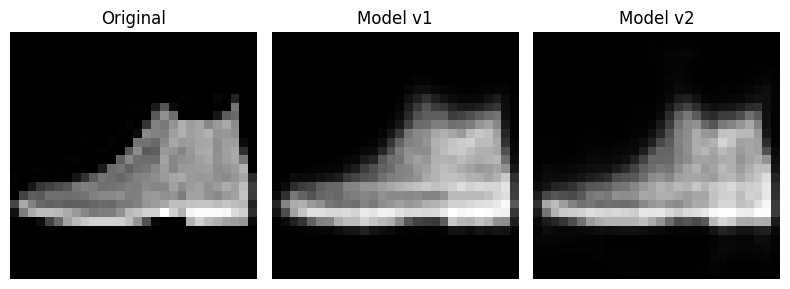

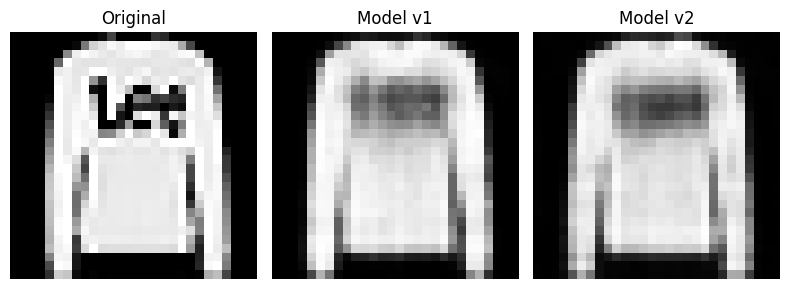

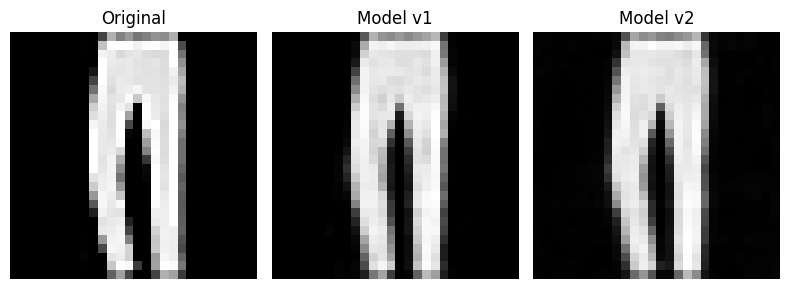

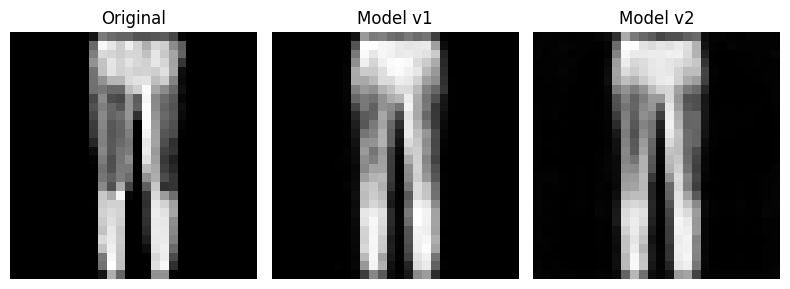

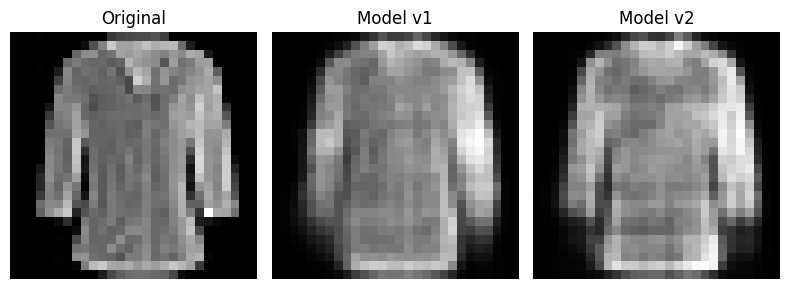

In [44]:
# Visualización de las primeras 5 imágenes originales y las reconstruidas por ambos modelos
for i in range(5):
  # tamaño de la figura
    plt.figure(figsize=(8, 3))

    # Imagenes originales en el primer espacio del figure
    plt.subplot(1, 3, 1)
    # Se muestran las imagenes del dataset de Test, y se reconstruye para entrar en la gráfica
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis('off')

    # Imagenes de reconstrucción del Autoencoder Model V1
    plt.subplot(1, 3, 2)
    # Se muestran las imagenes reconstrucción del Autoencoder Model V1 , y se reconstruye para entrar en la gráfica
    plt.imshow(reconstructed_model_v1[i].reshape(28, 28), cmap="gray")
    plt.title("Model v1")
    plt.axis('off')

    # Imagenes de reconstrucción del Autoencoder Model V2
    plt.subplot(1, 3, 3)
    # Se muestran las imagenes reconstrucción del Autoencoder Model V2 , y se reconstruye para entrar en la gráfica
    plt.imshow(reconstructed_model_v2[i].reshape(28, 28), cmap="gray")
    plt.title("Model v2")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Conclusión
Cuando se comparan los dos modelos se puede ver que por las pérdidas que presentan los dos modelos el Autoencoder V2 logro mejor desempeño a la hora de recontruir las imagenes del inicio, la diferencia es muy minima con el modelo Autoencoder V1, pero aun así es importante mencionar el resultado del otro modelo:
- Model Autoencoder V1: 0.0120
- Model Autoencoder V2: 0.0102

Esto indca que el modelo V2 también supo diferenciar de manera más clara las imagenes de la ropa, por lo que capto patrones claves y dio imagenes recostruidas un poco más exactas

Está diferencia se logra, ya que el modelo de Autoencoder V2 tiene diferente arquitectura y a la vez diferentes tipos de activación. Lo que hizo que fuera más eficiente a la hora de reconstruir las imagenes. Los hiperparametros fueron:
- latent_dim: 128
- learning_rate: 0.0005
- hidden_units: 256
- activation: Tanh

También es posible que el modelo v2 haya tenido una mayor capacidad de generalización o un mejor manejo de las imágenes durante el entrenamiento, lo que resultó en una reconstrucción más precisa.

A pesar de lo que se puede ver en los resultados ambos modelos son bastante buenos, y muestran resultados bastante aceptables y eso se demuestran en las imagenes finales donde se hace la comparación en la cual se puede ver que si bien el Autoencoder V2 capta algunas caracteristicas mejores que el Autoencoder V1, de todas maneras este último modelo da resultados buenos. Por lo que en este caso ningun modelo resulto se malo y logró ejecutarse en poco tiempo sin gastar tantos recursos de la computadora, por lo que podemos ver que en efecto este Dataset ajuda a la eficiencia de la ejecución